In [3]:
import pandas as pd

In [4]:
import matplotlib.pyplot as plt
import numpy as np

In [5]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [6]:
ratings=pd.read_excel("/content/drive/MyDrive/jesterds.xlsx")

In [8]:
ratings.head()

,User,no_of_jokes_rated,joke1,joke2,joke3,joke4,joke5,joke6,joke7,joke8,joke9,joke10,joke11,joke12,joke13,joke14,joke15,joke16,joke17,joke18,joke19,joke20,joke21,joke22,joke23,joke24,joke25,joke26,joke27,joke28,joke29,joke30,joke31,joke32,joke33,joke34,joke35,joke36,joke37,joke38,...,joke61,joke62,joke63,joke64,joke65,joke66,joke67,joke68,joke69,joke70,joke71,joke72,joke73,joke74,joke75,joke76,joke77,joke78,joke79,joke80,joke81,joke82,joke83,joke84,joke85,joke86,joke87,joke88,joke89,joke90,joke91,joke92,joke93,joke94,joke95,joke96,joke97,joke98,joke99,joke100
0,1,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,-8.50,-6.75,-7.18,8.45,-7.18,-7.52,-7.43,-9.81,-9.85,-9.85,-9.37,1.50,-4.37,-9.81,-8.50,1.12,7.82,2.86,9.13,-7.43,2.14,-4.08,-9.08,7.82,5.05,4.95,-9.17,-8.40,...,8.59,3.59,-6.84,-9.03,2.82,-1.36,-9.08,8.30,5.68,-4.81,99.0,99.00,99.0,99.00,99.00,99.00,99.00,-9.42,99.00,99.00,99.00,-7.72,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,2,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,6.75,8.64,4.42,7.43,4.56,-0.97,4.66,-0.68,3.30,-1.21,0.87,8.64,8.35,9.17,0.05,7.57,4.71,0.87,-0.39,6.99,6.50,-0.92,7.14,9.03,-1.80,0.73,7.09,3.40,...,-6.70,-3.35,-9.03,4.47,4.08,-3.83,8.74,1.12,0.78,7.52,-5.0,2.77,8.3,7.77,7.33,6.21,7.72,8.98,8.64,8.20,3.93,4.85,4.85,6.07,8.98,4.51,-0.05,3.69,4.56,0.58,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,3,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,7.33,7.57,9.37,6.17,-6.36,-6.89,-7.86,9.03,9.03,9.03,7.28,99.00,8.25,99.00,99.00,7.48,7.28,7.28,8.93,99.00,6.17,7.28,99.00,99.00,8.98,7.33,99.00,6.17,...,6.46,7.28,99.00,99.00,7.04,7.28,99.00,7.28,8.25,99.00,99.0,99.00,99.0,99.00,99.00,8.93,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,9.03,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,4,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,7.33,6.60,6.31,8.11,-7.23,-6.65,1.17,-6.60,-3.64,-2.09,5.34,99.00,99.00,99.00,99.00,2.91,3.93,6.75,6.60,99.00,6.65,-6.12,99.00,7.57,6.21,6.65,99.00,-8.30,...,0.00,-3.69,99.00,99.00,7.82,0.24,99.00,7.28,-2.33,99.00,99.0,99.00,99.0,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,0.63,99.00,99.00,-2.33,99.00,99.00,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,5,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,8.25,6.84,-3.93,7.23,-2.33,-9.66,2.72,-1.36,2.57,4.51,8.20,6.12,8.30,-1.26,7.77,1.89,-1.17,5.68,8.45,4.61,8.06,-9.47,7.28,5.68,2.48,3.20,-1.26,6.80,...,7.38,6.17,4.71,-2.28,7.38,4.56,7.14,4.22,3.01,3.83,99.0,99.00,99.0,99.00,99.00,99.00,4.13,99.00,99.00,99.00,5.24,5.92,0.87,7.28,3.93,-0.63,6.31,4.71,2.82,2.96,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


In [7]:
ratings.describe()

,User,no_of_jokes_rated,joke1,joke2,joke3,joke4,joke5,joke6,joke7,joke8,joke9,joke10,joke11,joke12,joke13,joke14,joke15,joke16,joke17,joke18,joke19,joke20,joke21,joke22,joke23,joke24,joke25,joke26,joke27,joke28,joke29,joke30,joke31,joke32,joke33,joke34,joke35,joke36,joke37,joke38,...,joke61,joke62,joke63,joke64,joke65,joke66,joke67,joke68,joke69,joke70,joke71,joke72,joke73,joke74,joke75,joke76,joke77,joke78,joke79,joke80,joke81,joke82,joke83,joke84,joke85,joke86,joke87,joke88,joke89,joke90,joke91,joke92,joke93,joke94,joke95,joke96,joke97,joke98,joke99,joke100
count,73422.000000,73422.000000,73422.000000,73422.000000,73422.000000,73422.000000,73422.000000,73422.000000,73422.000000,73422.000000,73422.000000,73422.000000,73422.000000,73422.000000,73422.000000,73422.00000,73422.000000,73422.000000,73422.000000,73422.000000,73422.000000,73422.000000,73422.000000,73422.000000,73422.000000,73422.000000,73422.000000,73422.000000,73422.000000,73422.000000,73422.000000,73422.000000,73422.000000,73422.000000,73422.000000,73422.000000,73422.000000,73422.000000,73422.000000,73422.000000,...,73422.000000,73422.000000,73422.000000,73422.000000,73422.000000,73422.000000,73422.000000,73422.000000,73422.000000,73422.000000,73422.000000,73422.000000,73422.000000,73422.000000,73422.000000,73422.000000,73422.00000,73422.000000,73422.000000,73422.000000,73422.000000,73422.000000,73422.000000,73422.000000,73422.000000,73422.000000,73422.000000,73422.000000,73422.000000,73422.000000,73422.000000,73422.000000,73422.000000,73422.000000,73422.000000,73422.00000,73422.000000,73422.000000,73422.000000,73422.000000
mean,36711.500000,56.338155,56.211819,51.510472,55.394141,57.270118,0.256784,46.322040,-0.606691,-0.982699,57.288728,46.570976,42.459103,41.150875,-1.922854,40.59591,-2.091812,-3.072628,-1.277145,-0.883009,0.191752,-1.188302,22.845381,43.114438,46.698472,56.353130,44.686201,34.240292,10.371905,33.217241,10.962951,51.551141,25.512248,12.287905,54.541120,41.865826,11.898415,9.832086,51.377350,36.646866,...,25.508410,15.594773,43.799135,50.490169,20.881671,19.459091,49.817349,19.358161,19.869651,43.223834,73.799400,74.102880,73.945167,72.943454,73.202844,73.500536,72.86984,73.238118,72.500857,72.980764,72.634622,72.531113,72.411690,72.045285,71.715519,71.362532,72.161185,71.596552,72.366154,70.873241,71.315702,70.718365,70.659867,69.936444,69.656639,69.52924,69.042337,68.648897,67.721219,73.010013
std,21195.250069,29.015936,48.771260,49.535086,49.195633,49.602694,5.499100,48.820756,5.846157,5.103122,49.262744,48.930068,48.136974,48.036093,5.348917,48.05906,5.322523,5.329122,4.560677,5.218846,5.241892,5.302341,39.982007,48.737594,49.472983,49.888153,49.180107,46.422899,26.118731,45.944519,27.513364,49.804554,41.838731,28.755122,49.989009,48.520677,28.549986,25.209436,50.267963,47.086217,...,41.697987,33.117104,49.181240,49.972526,38.696841,37.043720,50.084060,36.991573,37.565728,48.936808,43.509738,42.248407,42.842214,44.135221,43.677901,42.669087,43.52443,43.019006,43.961556,43.362015,43.321385,43.707975,43.360369,43.989941,44.128726,44.411626,43.514172,43.756385,42.954702,44.622514,43.922106,44.452671,44.105839,44.823490,44.963564,44.89848,45.074645,45.454245,46.130731,43.313624
min,1.000000,15.000000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.95000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,...,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.95000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.95000,-9.950000,-9.950000

In [9]:
#select joke columns iteratively and replace with nan
def rep99(ratings):
    ids = ratings.columns[2:]    
    for joke_id in ids: 
        ratings[joke_id] = ratings[joke_id].replace([99],np.nan)
    return ratings

In [10]:
# creating function to normalize the scores
def normalize(ratings):
    
    total = ratings.shape[0]
    for i in range(total):
        ratings.iloc[i, 2:] = ratings.iloc[i, 2:] - np.mean(ratings.iloc[i, 2:])
    return ratings

In [11]:
#select joke columns and replace nan values with 0
def rep0(ratings):
    ids = ratings.columns[2:]    
    for joke_id in ids: 
        ratings[joke_id] = ratings[joke_id].replace([np.nan],0)
    return ratings

In [12]:
ratings_rep_99 = rep99(ratings)

In [13]:
normalized_ratings = normalize(ratings_rep_99)
ratings_rep_nan = rep0(normalized_ratings)

In [14]:
normalized_ratings=ratings_rep_nan.copy()

In [15]:
normalized_ratings.head()

,User,no_of_jokes_rated,joke1,joke2,joke3,joke4,joke5,joke6,joke7,joke8,joke9,joke10,joke11,joke12,joke13,joke14,joke15,joke16,joke17,joke18,joke19,joke20,joke21,joke22,joke23,joke24,joke25,joke26,joke27,joke28,joke29,joke30,joke31,joke32,joke33,joke34,joke35,joke36,joke37,joke38,...,joke61,joke62,joke63,joke64,joke65,joke66,joke67,joke68,joke69,joke70,joke71,joke72,joke73,joke74,joke75,joke76,joke77,joke78,joke79,joke80,joke81,joke82,joke83,joke84,joke85,joke86,joke87,joke88,joke89,joke90,joke91,joke92,joke93,joke94,joke95,joke96,joke97,joke98,joke99,joke100
0,1,74,-4.388108,12.221892,-6.228108,-4.728108,-4.088108,-5.068108,-6.418108,7.601892,-5.548108,-1.328108,-5.068108,-3.318108,-3.748108,11.881892,-3.748108,-4.088108,-3.998108,-6.378108,-6.418108,-6.418108,-5.938108,4.931892,-0.938108,-6.378108,-5.068108,4.551892,11.251892,6.291892,12.561892,-3.998108,5.571892,-0.648108,-5.648108,11.251892,8.481892,8.381892,-5.738108,-4.968108,...,12.021892,7.021892,-3.408108,-5.598108,6.251892,2.071892,-5.648108,11.731892,9.111892,-1.378108,0.0000,0.0000,0.0000,0.0000,0.0000,0.000000,0.000000,-5.988108,0.0000,0.000000,0.000000,-4.288108,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.251892,0.000000,0.000000,0.000000,0.000000,0.000000,-2.198108,0.000000,0.000000,0.000000
1,2,100,1.333700,-3.036300,3.613700,1.623700,-5.126300,-12.406300,-3.476300,-8.086300,6.133700,6.473700,4.003700,5.893700,1.673700,4.683700,1.813700,-3.716300,1.913700,-3.426300,0.553700,-3.956300,-1.876300,5.893700,5.603700,6.423700,-2.696300,4.823700,1.963700,-1.876300,-3.136300,4.243700,3.753700,-3.666300,4.393700,6.283700,-4.546300,-2.016300,4.343700,0.653700,...,-9.446300,-6.096300,-11.776300,1.723700,1.333700,-6.576300,5.993700,-1.626300,-1.966300,4.773700,-7.7463,0.0237,5.5537,5.0237,4.5837,3.463700,4.973700,6.233700,5.8937,5.453700,1.183700,2.103700,2.103700,3.323700,6.233700,1.763700,-2.796300,0.943700,1.813700,-2.166300,0.073700,-7.696300,-3.036300,5.113700,-2.936300,-4.886300,0.313700,-2.406300,-7.066300,-1.676300
2,3,49,0.000000,0.000000,0.000000,0.000000,1.930612,2.170612,1.930612,2.170612,0.000000,0.000000,0.230612,0.470612,2.270612,-0.929388,-13.459388,-13.989388,-14.959388,1.930612,1.930612,1.930612,0.180612,0.000000,1.150612,0.000000,0.000000,0.380612,0.180612,0.180612,1.830612,0.000000,-0.929388,0.180612,0.000000,0.000000,1.880612,0.230612,0.000000,-0.929388,...,-0.639388,0.180612,0.000000,0.000000,-0.059388,0.180612,0.000000,0.180612,1.150612,0.000000,0.0000,0.0000,0.0000,0.0000,0.0000,1.830612,0.000000,0.000000,0.0000,1.980612,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.930612,0.000000,0.000000,0.000000,1.980612,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,4,48,0.000000,5.691875,0.000000,0.000000,-0.858125,5.501875,-5.478125,3.551875,0.000000,-0.818125,4.671875,3.941875,3.651875,5.451875,-9.888125,-9.308125,-1.488125,-9.258125,-6.298125,-4.748125,2.681875,0.000000,0.000000,0.000000,0.000000,0.251875,1.271875,4.091875,3.941875,0.000000,3.991875,-8.778125,0.000000,4.911875,3.551875,3.991875,0.000000,-10.958125,...,-2.658125,-6.348125,0.000000,0.000000,5.161875,-2.418125,0.000000,4.621875,-4.988125,0.000000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.028125,0.000000,0.000000,-4.988125,0.000000,0.000000,0.000000,0.000000,0.000000,-2.128125,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,5,91,5.247363,1.357363,-7.422637,-8.642637,-1.892637,-1.652637,3.787363,1.357363,-3.692637,2.477363,4.997363,3.587363,-7.182637,3.977363,-5.582637,-12.912637,-0.532637,-4.612637,-0.682637,1.257363,4.947363,2.867363,5.047363,-4.512637,4.517363,-1.362637,-4.422637,2.427363,5.197363,1.357363,4.807363,-12.722637,4.027363,2.427363,-0.772637,-0.052637,-4.512637,3.547363,...,4.127363,2.917363,1.457363,-5.532637,4.127363,1.307363,3.887363,0.967363,-0.242637,0.577363,0.0000,0.0000,0.0000,0.0000,0.0000,0.000000,0.877363,0.000000

In [17]:
#normalized_ratings.to_csv("/content/drive/MyDrive/normalizedratings.csv")

In [18]:
#normalized_ratings=pd.read_csv("/content/drive/MyDrive/normalizedratings_new.csv")

In [ ]:
normalized_ratings

,User,no_of_jokes_rated,joke1,joke2,joke3,joke4,joke5,joke6,joke7,joke8,joke9,joke10,joke11,joke12,joke13,joke14,joke15,joke16,joke17,joke18,joke19,joke20,joke21,joke22,joke23,joke24,joke25,joke26,joke27,joke28,joke29,joke30,joke31,joke32,joke33,joke34,joke35,joke36,joke37,joke38,...,joke61,joke62,joke63,joke64,joke65,joke66,joke67,joke68,joke69,joke70,joke71,joke72,joke73,joke74,joke75,joke76,joke77,joke78,joke79,joke80,joke81,joke82,joke83,joke84,joke85,joke86,joke87,joke88,joke89,joke90,joke91,joke92,joke93,joke94,joke95,joke96,joke97,joke98,joke99,joke100
0,1,74,-5.2804,11.3296,-7.1204,-5.6204,-4.9804,-5.9604,-7.3104,6.7096,-6.4404,-2.2204,-5.9604,-4.2104,-4.6404,10.9896,-4.6404,-4.9804,-4.8904,-7.2704,-7.3104,-7.3104,-6.8304,4.0396,-1.8304,-7.2704,-5.9604,3.6596,10.3596,5.3996,11.6696,-4.8904,4.6796,-1.5404,-6.5404,10.3596,7.5896,7.4896,-6.6304,-5.8604,...,11.1296,6.1296,-4.3004,-6.4904,5.3596,1.1796,-6.5404,10.8396,8.2196,-2.2704,2.5396,2.5396,2.5396,2.5396,2.5396,2.5396,2.5396,-6.8804,2.5396,2.5396,2.5396,-5.1804,2.5396,2.5396,2.5396,2.5396,2.5396,2.5396,2.5396,2.5396,5.3596,2.5396,2.5396,2.5396,2.5396,2.5396,-3.0904,2.5396,2.5396,2.5396
1,2,100,1.3337,-3.0363,3.6137,1.6237,-5.1263,-12.4063,-3.4763,-8.0863,6.1337,6.4737,4.0037,5.8937,1.6737,4.6837,1.8137,-3.7163,1.9137,-3.4263,0.5537,-3.9563,-1.8763,5.8937,5.6037,6.4237,-2.6963,4.8237,1.9637,-1.8763,-3.1363,4.2437,3.7537,-3.6663,4.3937,6.2837,-4.5463,-2.0163,4.3437,0.6537,...,-9.4463,-6.0963,-11.7763,1.7237,1.3337,-6.5763,5.9937,-1.6263,-1.9663,4.7737,-7.7463,0.0237,5.5537,5.0237,4.5837,3.4637,4.9737,6.2337,5.8937,5.4537,1.1837,2.1037,2.1037,3.3237,6.2337,1.7637,-2.7963,0.9437,1.8137,-2.1663,0.0737,-7.6963,-3.0363,5.1137,-2.9363,-4.8863,0.3137,-2.4063,-7.0663,-1.6763
2,3,49,-3.4787,-3.4787,-3.4787,-3.4787,5.5513,5.7913,5.5513,5.7913,-3.4787,-3.4787,3.8513,4.0913,5.8913,2.6913,-9.8387,-10.3687,-11.3387,5.5513,5.5513,5.5513,3.8013,-3.4787,4.7713,-3.4787,-3.4787,4.0013,3.8013,3.8013,5.4513,-3.4787,2.6913,3.8013,-3.4787,-3.4787,5.5013,3.8513,-3.4787,2.6913,...,2.9813,3.8013,-3.4787,-3.4787,3.5613,3.8013,-3.4787,3.8013,4.7713,-3.4787,-3.4787,-3.4787,-3.4787,-3.4787,-3.4787,5.4513,-3.4787,-3.4787,-3.4787,5.6013,-3.4787,-3.4787,-3.4787,-3.4787,-3.4787,-3.4787,-3.4787,-3.4787,-3.4787,5.5513,-3.4787,-3.4787,-3.4787,5.6013,-3.4787,-3.4787,-3.4787,-3.4787,-3.4787,-3.4787
3,4,48,-1.2759,7.0741,-1.2759,-1.2759,0.5241,6.8841,-4.0959,4.9341,-1.2759,0.5641,6.0541,5.3241,5.0341,6.8341,-8.5059,-7.9259,-0.1059,-7.8759,-4.9159,-3.3659,4.0641,-1.2759,-1.2759,-1.2759,-1.2759,1.6341,2.6541,5.4741,5.3241,-1.2759,5.3741,-7.3959,-1.2759,6.2941,4.9341,5.3741,-1.2759,-9.5759,...,-1.2759,-4.9659,-1.2759,-1.2759,6.5441,-1.0359,-1.2759,6.0041,-3.6059,-1.2759,-1.2759,-1.2759,-1.2759,-1.2759,-1.2759,-1.2759,-1.2759,-1.2759,-1.2759,-1.2759,-1.2759,-1.2759,-1.2759,-1.2759,-0.6459,-1.2759,-1.2759,-3.6059,-1.2759,-1.2759,-1.2759,-1.2759,-1.2759,-0.7459,-1.2759,-1.2759,-1.2759,-1.2759,-1.2759,-1.2759
4,5,91,5.5401,1.6501,-7.1299,-8.3499,-1.5999,-1.3599,4.0801,1.6501,-3.3999,2.7701,5.2901,3.8801,-6.8899,4.2701,-5.2899,-12.6199,-0.2399,-4.3199,-0.3899,1.5501,5.2401,3.1601,5.3401,-4.2199,4.8101,-1.0699,-4.1299,2.7201,5.4901,1.6501,5.1001,-12.4299,4.3201,2.7201,-0.4799,0.2401,-4.2199,3.8401,...,4.4201,3.2101,1.7501,-5.2399,4.4201,1.6001,4.1801,1.2601,0.0501,0.8701,-2.9599,-2.9599,-2.9599,-2.9599,-2.9599,-2.9599,1.1701,-2.9599,-2.9599,-2.9599,2.2801,2.9601,-2.0899,4.3201,0.9701,-3.5899,3.3501,1.7501,-0.1399,0.0001,2.2301,2.6201,1.3101,2.2301,2.7701,-1.4099,0.1501,3.5901,-1.1599,-1.3599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73417,73418,21,-1.7341,-1.7341,-1.7341,-1.7341,4.0459,6.7159,-1.7341,6.4659,-1.7341,6.7659,-1.7341,-1.7341

In [19]:
normalized_ratings.shape

(73422, 102)

In [20]:
normalized_ratings.head()

,User,no_of_jokes_rated,joke1,joke2,joke3,joke4,joke5,joke6,joke7,joke8,joke9,joke10,joke11,joke12,joke13,joke14,joke15,joke16,joke17,joke18,joke19,joke20,joke21,joke22,joke23,joke24,joke25,joke26,joke27,joke28,joke29,joke30,joke31,joke32,joke33,joke34,joke35,joke36,joke37,joke38,...,joke61,joke62,joke63,joke64,joke65,joke66,joke67,joke68,joke69,joke70,joke71,joke72,joke73,joke74,joke75,joke76,joke77,joke78,joke79,joke80,joke81,joke82,joke83,joke84,joke85,joke86,joke87,joke88,joke89,joke90,joke91,joke92,joke93,joke94,joke95,joke96,joke97,joke98,joke99,joke100
0,1,74,-4.388108,12.221892,-6.228108,-4.728108,-4.088108,-5.068108,-6.418108,7.601892,-5.548108,-1.328108,-5.068108,-3.318108,-3.748108,11.881892,-3.748108,-4.088108,-3.998108,-6.378108,-6.418108,-6.418108,-5.938108,4.931892,-0.938108,-6.378108,-5.068108,4.551892,11.251892,6.291892,12.561892,-3.998108,5.571892,-0.648108,-5.648108,11.251892,8.481892,8.381892,-5.738108,-4.968108,...,12.021892,7.021892,-3.408108,-5.598108,6.251892,2.071892,-5.648108,11.731892,9.111892,-1.378108,0.0000,0.0000,0.0000,0.0000,0.0000,0.000000,0.000000,-5.988108,0.0000,0.000000,0.000000,-4.288108,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.251892,0.000000,0.000000,0.000000,0.000000,0.000000,-2.198108,0.000000,0.000000,0.000000
1,2,100,1.333700,-3.036300,3.613700,1.623700,-5.126300,-12.406300,-3.476300,-8.086300,6.133700,6.473700,4.003700,5.893700,1.673700,4.683700,1.813700,-3.716300,1.913700,-3.426300,0.553700,-3.956300,-1.876300,5.893700,5.603700,6.423700,-2.696300,4.823700,1.963700,-1.876300,-3.136300,4.243700,3.753700,-3.666300,4.393700,6.283700,-4.546300,-2.016300,4.343700,0.653700,...,-9.446300,-6.096300,-11.776300,1.723700,1.333700,-6.576300,5.993700,-1.626300,-1.966300,4.773700,-7.7463,0.0237,5.5537,5.0237,4.5837,3.463700,4.973700,6.233700,5.8937,5.453700,1.183700,2.103700,2.103700,3.323700,6.233700,1.763700,-2.796300,0.943700,1.813700,-2.166300,0.073700,-7.696300,-3.036300,5.113700,-2.936300,-4.886300,0.313700,-2.406300,-7.066300,-1.676300
2,3,49,0.000000,0.000000,0.000000,0.000000,1.930612,2.170612,1.930612,2.170612,0.000000,0.000000,0.230612,0.470612,2.270612,-0.929388,-13.459388,-13.989388,-14.959388,1.930612,1.930612,1.930612,0.180612,0.000000,1.150612,0.000000,0.000000,0.380612,0.180612,0.180612,1.830612,0.000000,-0.929388,0.180612,0.000000,0.000000,1.880612,0.230612,0.000000,-0.929388,...,-0.639388,0.180612,0.000000,0.000000,-0.059388,0.180612,0.000000,0.180612,1.150612,0.000000,0.0000,0.0000,0.0000,0.0000,0.0000,1.830612,0.000000,0.000000,0.0000,1.980612,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.930612,0.000000,0.000000,0.000000,1.980612,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,4,48,0.000000,5.691875,0.000000,0.000000,-0.858125,5.501875,-5.478125,3.551875,0.000000,-0.818125,4.671875,3.941875,3.651875,5.451875,-9.888125,-9.308125,-1.488125,-9.258125,-6.298125,-4.748125,2.681875,0.000000,0.000000,0.000000,0.000000,0.251875,1.271875,4.091875,3.941875,0.000000,3.991875,-8.778125,0.000000,4.911875,3.551875,3.991875,0.000000,-10.958125,...,-2.658125,-6.348125,0.000000,0.000000,5.161875,-2.418125,0.000000,4.621875,-4.988125,0.000000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.028125,0.000000,0.000000,-4.988125,0.000000,0.000000,0.000000,0.000000,0.000000,-2.128125,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,5,91,5.247363,1.357363,-7.422637,-8.642637,-1.892637,-1.652637,3.787363,1.357363,-3.692637,2.477363,4.997363,3.587363,-7.182637,3.977363,-5.582637,-12.912637,-0.532637,-4.612637,-0.682637,1.257363,4.947363,2.867363,5.047363,-4.512637,4.517363,-1.362637,-4.422637,2.427363,5.197363,1.357363,4.807363,-12.722637,4.027363,2.427363,-0.772637,-0.052637,-4.512637,3.547363,...,4.127363,2.917363,1.457363,-5.532637,4.127363,1.307363,3.887363,0.967363,-0.242637,0.577363,0.0000,0.0000,0.0000,0.0000,0.0000,0.000000,0.877363,0.000000

In [21]:
a_list = []
for i in list(ratings_rep_nan.iloc[:,2:]):
    a=[]
    a.append((ratings_rep_nan[i].tolist()))
    for i in a:
        for j in i:
            a_list.append(j)

In [22]:
print(len(a_list))

7342200


Text(0.5, 0, 'Ratings')

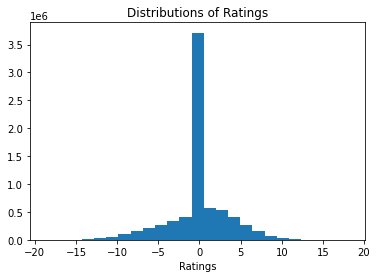

In [23]:
plt.hist(a_list,bins=25)
plt.title("Distributions of Ratings")
plt.xlabel("Ratings")

In [24]:
import numpy as np

b_list = []
for i in list(ratings_rep_nan.iloc[:,2:]):
    b=[]
#     print(ratings[i])
    b.append(np.mean((ratings_rep_nan[i].tolist())))
    for i in b:
            b_list.append(i)

In [25]:
import collections
frequency = collections.Counter(b_list)

Text(0.5, 0, 'average_ratings')

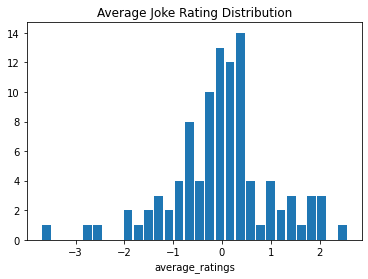

In [26]:
plt.hist(b_list,bins=30,rwidth=0.85)
plt.title("Average Joke Rating Distribution")
plt.xlabel("average_ratings")

In [34]:
#### creating a function to calculate correlation
def weight_factor(a, b):
    a1, a2, a3 = 0, 0, 0 
    for i, j in zip(a, b):
        a1+=i*j
        a2+=i*i
        a3+=j*j
    return a1/(np.sqrt(a2) * np.sqrt(a3))

In [28]:

# Filtering for users who have rated all the jokes
full_ratings = normalized_ratings[normalized_ratings['no_of_jokes_rated'] == 100]
print('total user count who have rated all the jokes: ', len(full_ratings))
# We will be randomly using one out of these users as active user and use it to find 
# similarity with complete_ratings dataset. 
incomplete_ratings = normalized_ratings[normalized_ratings['no_of_jokes_rated'] != 100]
print('total user count who have not rated all the jokes: ', len(incomplete_ratings))

total user count who have rated all the jokes:  14117
total user count who have not rated all the jokes:  59305


In [ ]:
full_ratings.head()

,User,no_of_jokes_rated,joke1,joke2,joke3,joke4,joke5,joke6,joke7,joke8,joke9,joke10,joke11,joke12,joke13,joke14,joke15,joke16,joke17,joke18,joke19,joke20,joke21,joke22,joke23,joke24,joke25,joke26,joke27,joke28,joke29,joke30,joke31,joke32,joke33,joke34,joke35,joke36,joke37,joke38,...,joke61,joke62,joke63,joke64,joke65,joke66,joke67,joke68,joke69,joke70,joke71,joke72,joke73,joke74,joke75,joke76,joke77,joke78,joke79,joke80,joke81,joke82,joke83,joke84,joke85,joke86,joke87,joke88,joke89,joke90,joke91,joke92,joke93,joke94,joke95,joke96,joke97,joke98,joke99,joke100
1,2,100,1.3337,-3.0363,3.6137,1.6237,-5.1263,-12.4063,-3.4763,-8.0863,6.1337,6.4737,4.0037,5.8937,1.6737,4.6837,1.8137,-3.7163,1.9137,-3.4263,0.5537,-3.9563,-1.8763,5.8937,5.6037,6.4237,-2.6963,4.8237,1.9637,-1.8763,-3.1363,4.2437,3.7537,-3.6663,4.3937,6.2837,-4.5463,-2.0163,4.3437,0.6537,...,-9.4463,-6.0963,-11.7763,1.7237,1.3337,-6.5763,5.9937,-1.6263,-1.9663,4.7737,-7.7463,0.0237,5.5537,5.0237,4.5837,3.4637,4.9737,6.2337,5.8937,5.4537,1.1837,2.1037,2.1037,3.3237,6.2337,1.7637,-2.7963,0.9437,1.8137,-2.1663,0.0737,-7.6963,-3.0363,5.1137,-2.9363,-4.8863,0.3137,-2.4063,-7.0663,-1.6763
5,6,100,-1.2723,1.3577,5.3377,-3.6023,-2.1923,0.5777,-3.7923,4.0277,-1.7523,3.0977,-1.9023,-0.8323,-0.1023,-3.6923,5.3877,-4.0323,1.2077,2.7177,2.6177,-1.2223,1.8877,4.3177,2.5177,-2.8723,2.6677,2.6177,-0.3423,-0.6323,4.2177,-2.0423,0.9677,4.5577,-1.7023,-0.5923,3.3477,4.4077,-1.3123,-3.1623,...,-1.7523,2.0377,0.2877,-4.5223,-3.0123,-4.9123,-4.5223,-4.0823,2.9577,-2.0923,-4.7623,-0.2923,-0.1023,0.4777,-2.3823,-1.6023,0.5777,-2.0423,-4.9523,5.6277,-1.3123,2.0377,-2.7223,-1.2223,4.6077,3.4877,0.9677,2.9577,-0.7823,0.1877,1.3577,-1.9923,4.2177,1.9377,2.7177,1.5477,4.9477,-4.1823,-0.1523,1.4477
7,8,100,9.2269,5.5469,11.5569,-3.8231,-5.7731,0.6869,11.6569,3.7969,-2.8031,-2.0331,10.5869,-5.4731,-4.5531,-5.5731,2.6769,-7.5131,-4.7031,-4.7931,3.4069,2.0969,-2.3231,-5.0431,3.5069,-5.8631,6.1769,2.4869,5.8369,-1.0631,9.9569,-1.7831,1.9469,11.6569,8.2169,-1.0131,-3.0531,3.9869,-4.7531,5.3969,...,-0.8131,-3.7331,-0.5231,-6.8331,-0.2331,-4.9431,-0.8631,-1.8331,-7.4231,0.2969,-7.5131,-1.4031,2.8769,-5.4731,-7.4631,4.1869,-1.7831,0.0069,-6.7431,-6.4931,5.9269,-2.1731,-3.0531,-3.5831,-7.5131,2.0469,-1.7431,2.2869,2.1469,-5.5731,9.6169,1.2669,2.2869,-3.2931,-0.7731,-0.9631,4.5269,2.3369,3.6969,2.3869
8,9,100,-2.9956,-2.7456,-8.6256,-6.0956,-7.9456,0.5044,-4.4956,-8.1356,-7.0656,-0.8056,-2.1156,0.5044,-4.0556,0.3044,-7.9456,-6.1956,-7.9456,-2.1156,-2.5556,0.5044,4.7744,-0.8056,0.5044,2.0044,4.5844,3.7044,5.6444,3.0744,1.7644,0.5044,7.1544,1.3244,0.5044,5.4544,4.1444,1.7644,-2.3156,-1.0456,...,2.0044,6.3244,2.2044,-5.7056,5.6444,5.6444,3.4144,2.2044,7.1544,2.2044,-3.9656,4.9644,-1.2456,-5.5156,0.5044,0.5044,1.5744,0.5044,0.5044,0.5044,0.5044,-2.4056,0.5044,-2.4056,-2.6056,0.5044,0.5044,6.5244,5.3544,-1.4356,5.1644,0.5044,4.9644,0.5044,0.5044,0.5044,0.5044,0.5044,-2.6056,-4.1556
11,12,100,0.8691,1.3591,2.1291,-2.8209,0.2891,0.2891,-1.4109,4.5591,-7.6709,-1.8009,3.3891,1.3091,5.1891,-3.3009,-2.2409,-2.4809,5.0891,-0.7309,-1.0209,0.9191,1.9891,0.1891,-5.0509,-4.8109,-2.0909,-1.8009,7.1291,-0.5909,5.5291,-3.9409,-0.2009,3.8291,-1.1209,-4.2309,7.1791,4.7091,1.9891,-0.3409,...,-0.5909,-0.6809,1.0191,-2.5809,1.9891,-2.8709,-5.5409,-0.9309,-0.2909,-3.0609,-3.3509,0.6791,1.2591,-0.4409,1.5991,2.6191,-4.9109,1.5991,0.6791,2.8591,1.0191,0.2391,-3.0109,-1.0709,0.1391,-1.0709,1.4491,1.9391,5.7691,-2.9609,1.0191,1.2591,-0.1509,-3.7409,3.0091,4.9991,3.6391,2.0391,4.0691,4.2191


In [ ]:
incomplete_ratings.head()

,User,no_of_jokes_rated,joke1,joke2,joke3,joke4,joke5,joke6,joke7,joke8,joke9,joke10,joke11,joke12,joke13,joke14,joke15,joke16,joke17,joke18,joke19,joke20,joke21,joke22,joke23,joke24,joke25,joke26,joke27,joke28,joke29,joke30,joke31,joke32,joke33,joke34,joke35,joke36,joke37,joke38,...,joke61,joke62,joke63,joke64,joke65,joke66,joke67,joke68,joke69,joke70,joke71,joke72,joke73,joke74,joke75,joke76,joke77,joke78,joke79,joke80,joke81,joke82,joke83,joke84,joke85,joke86,joke87,joke88,joke89,joke90,joke91,joke92,joke93,joke94,joke95,joke96,joke97,joke98,joke99,joke100
0,1,74,-5.2804,11.3296,-7.1204,-5.6204,-4.9804,-5.9604,-7.3104,6.7096,-6.4404,-2.2204,-5.9604,-4.2104,-4.6404,10.9896,-4.6404,-4.9804,-4.8904,-7.2704,-7.3104,-7.3104,-6.8304,4.0396,-1.8304,-7.2704,-5.9604,3.6596,10.3596,5.3996,11.6696,-4.8904,4.6796,-1.5404,-6.5404,10.3596,7.5896,7.4896,-6.6304,-5.8604,...,11.1296,6.1296,-4.3004,-6.4904,5.3596,1.1796,-6.5404,10.8396,8.2196,-2.2704,2.5396,2.5396,2.5396,2.5396,2.5396,2.5396,2.5396,-6.8804,2.5396,2.5396,2.5396,-5.1804,2.5396,2.5396,2.5396,2.5396,2.5396,2.5396,2.5396,2.5396,5.3596,2.5396,2.5396,2.5396,2.5396,2.5396,-3.0904,2.5396,2.5396,2.5396
2,3,49,-3.4787,-3.4787,-3.4787,-3.4787,5.5513,5.7913,5.5513,5.7913,-3.4787,-3.4787,3.8513,4.0913,5.8913,2.6913,-9.8387,-10.3687,-11.3387,5.5513,5.5513,5.5513,3.8013,-3.4787,4.7713,-3.4787,-3.4787,4.0013,3.8013,3.8013,5.4513,-3.4787,2.6913,3.8013,-3.4787,-3.4787,5.5013,3.8513,-3.4787,2.6913,...,2.9813,3.8013,-3.4787,-3.4787,3.5613,3.8013,-3.4787,3.8013,4.7713,-3.4787,-3.4787,-3.4787,-3.4787,-3.4787,-3.4787,5.4513,-3.4787,-3.4787,-3.4787,5.6013,-3.4787,-3.4787,-3.4787,-3.4787,-3.4787,-3.4787,-3.4787,-3.4787,-3.4787,5.5513,-3.4787,-3.4787,-3.4787,5.6013,-3.4787,-3.4787,-3.4787,-3.4787,-3.4787,-3.4787
3,4,48,-1.2759,7.0741,-1.2759,-1.2759,0.5241,6.8841,-4.0959,4.9341,-1.2759,0.5641,6.0541,5.3241,5.0341,6.8341,-8.5059,-7.9259,-0.1059,-7.8759,-4.9159,-3.3659,4.0641,-1.2759,-1.2759,-1.2759,-1.2759,1.6341,2.6541,5.4741,5.3241,-1.2759,5.3741,-7.3959,-1.2759,6.2941,4.9341,5.3741,-1.2759,-9.5759,...,-1.2759,-4.9659,-1.2759,-1.2759,6.5441,-1.0359,-1.2759,6.0041,-3.6059,-1.2759,-1.2759,-1.2759,-1.2759,-1.2759,-1.2759,-1.2759,-1.2759,-1.2759,-1.2759,-1.2759,-1.2759,-1.2759,-1.2759,-1.2759,-0.6459,-1.2759,-1.2759,-3.6059,-1.2759,-1.2759,-1.2759,-1.2759,-1.2759,-0.7459,-1.2759,-1.2759,-1.2759,-1.2759,-1.2759,-1.2759
4,5,91,5.5401,1.6501,-7.1299,-8.3499,-1.5999,-1.3599,4.0801,1.6501,-3.3999,2.7701,5.2901,3.8801,-6.8899,4.2701,-5.2899,-12.6199,-0.2399,-4.3199,-0.3899,1.5501,5.2401,3.1601,5.3401,-4.2199,4.8101,-1.0699,-4.1299,2.7201,5.4901,1.6501,5.1001,-12.4299,4.3201,2.7201,-0.4799,0.2401,-4.2199,3.8401,...,4.4201,3.2101,1.7501,-5.2399,4.4201,1.6001,4.1801,1.2601,0.0501,0.8701,-2.9599,-2.9599,-2.9599,-2.9599,-2.9599,-2.9599,1.1701,-2.9599,-2.9599,-2.9599,2.2801,2.9601,-2.0899,4.3201,0.9701,-3.5899,3.3501,1.7501,-0.1399,0.0001,2.2301,2.6201,1.3101,2.2301,2.7701,-1.4099,0.1501,3.5901,-1.1599,-1.3599
6,7,47,-2.1250,-2.1250,-2.1250,-2.1250,6.4650,-11.9750,5.5950,6.6650,-2.1250,-2.1250,2.1450,5.4950,-8.3850,0.8350,3.9450,-5.6250,-4.2150,4.0450,3.0250,2.2950,3.5050,0.3050,-2.1250,-2.1250,2.0050,4.9650,5.2050,5.0550,-1.2050,-2.1250,3.0250,3.7450,-2.1250,-2.1250,5.8350,1.6650,-2.1250,-0.5750,...,-3.6250,3.6550,-2.1250,-2.1250,6.8050,6.3750,-2.1250,0.3050,5.3550,-2.1250,-2.1250,3.8450,4.2350,-2.1250,-2.1250,-2.1250,-2.1250,-2.1250,-2.1250,-2.1250,-2.1250,-2.1250,1.7050,-2.1250,-2.1250,-2.1250,-2.1250,-2.1250,-2.1250,-2.1250,-2.1250,-2.1250,-2.1250,-2.1250,-2.1250,0.2050,-2.1250,-2.1250,-2.1250,-2.1250


In [29]:
# selecting a random user to recommend a joke to
row = 151
current_user = incomplete_ratings.iloc[row, 0]
print("Selecting a random user with user id {} as user for which we will recommend the joke".format(str(current_user)))

Selecting a random user with user id 206 as user for which we will recommend the joke


In [ ]:
current_user

206

In [30]:
print('rating by current user {} for all the 100 jokes'.format(str(current_user)))
active_user = incomplete_ratings[incomplete_ratings['User'] == current_user]
current_user_rating = active_user.iloc[:, 2:]
current_user_rating

rating by current user 206 for all the 100 jokes


,joke1,joke2,joke3,joke4,joke5,joke6,joke7,joke8,joke9,joke10,joke11,joke12,joke13,joke14,joke15,joke16,joke17,joke18,joke19,joke20,joke21,joke22,joke23,joke24,joke25,joke26,joke27,joke28,joke29,joke30,joke31,joke32,joke33,joke34,joke35,joke36,joke37,joke38,joke39,joke40,...,joke61,joke62,joke63,joke64,joke65,joke66,joke67,joke68,joke69,joke70,joke71,joke72,joke73,joke74,joke75,joke76,joke77,joke78,joke79,joke80,joke81,joke82,joke83,joke84,joke85,joke86,joke87,joke88,joke89,joke90,joke91,joke92,joke93,joke94,joke95,joke96,joke97,joke98,joke99,joke100
205,0.0,0.0,0.0,0.0,2.220526,0.0,1.740526,2.120526,0.0,2.270526,4.360526,0.0,2.120526,0.0,0.670526,-10.299474,1.980526,-10.059474,-3.939474,0.470526,3.090526,0.0,0.0,0.0,0.0,4.020526,-12.919474,4.210526,4.210526,0.0,0.0,2.760526,0.0,0.0,5.470526,2.120526,0.0,0.0,0.0,0.0,...,-13.019474,1.930526,0.570526,0.0,5.470526,5.420526,0.0,-0.299474,3.870526,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-13.019474,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.630526,0.0,0.0,0.0,-3.899474,0.0


In [35]:

# saving active user ratings into 1 d list
active_user_rating_list = current_user_rating.values.ravel()
# finding similarity between active user and all its neighbours among complete rating users
similarity = np.array([(full_ratings.iloc[i, 0],\
             weight_factor(active_user_rating_list, full_ratings.iloc[i, 2:]))\
             for i in range(full_ratings.shape[0])])

In [36]:

score2 = np.argsort( similarity[:,1] )
similarity = similarity[score2]
similarity

array([[ 3.60530000e+04, -3.59609232e-01],
       [ 2.01240000e+04, -3.19251465e-01],
       [ 1.46240000e+04, -3.07452578e-01],
       ...,
       [ 1.69930000e+04,  5.08630511e-01],
       [ 1.05640000e+04,  5.64506038e-01],
       [ 1.80000000e+04,  5.77705958e-01]])

In [37]:
neighbours = similarity[similarity[:,1] > 0.1]
print('There are  {}  neighbours from which we will randomly select 30 '.format(len(neighbours)))

There are  5443  neighbours from which we will randomly select 30 


In [39]:
# by replace = False, ensuring that no duplicate neighbour is selected !!
nearby_30_user = np.random.choice(range(len(neighbours)), 30, replace=False)
selected_neighbours = neighbours[nearby_30_user]
selected_neighbours

array([[3.73220000e+04, 1.41690018e-01],
       [4.23500000e+03, 1.59243466e-01],
       [5.77200000e+03, 2.85553750e-01],
       [4.77010000e+04, 1.53367244e-01],
       [4.75550000e+04, 1.69908213e-01],
       [9.95000000e+03, 2.39580450e-01],
       [4.48990000e+04, 1.17567731e-01],
       [1.44140000e+04, 1.08933057e-01],
       [3.92220000e+04, 2.28041503e-01],
       [4.60590000e+04, 1.64572871e-01],
       [1.87580000e+04, 2.35079016e-01],
       [2.24010000e+04, 2.97797377e-01],
       [2.99840000e+04, 1.73532369e-01],
       [2.42750000e+04, 1.16811933e-01],
       [2.87290000e+04, 1.70220175e-01],
       [9.24900000e+03, 1.86430488e-01],
       [3.07800000e+04, 1.42779641e-01],
       [7.53000000e+02, 2.19125587e-01],
       [4.01130000e+04, 2.41290632e-01],
       [4.35730000e+04, 1.17496169e-01],
       [2.57320000e+04, 1.37300944e-01],
       [2.12310000e+04, 2.01825044e-01],
       [2.48650000e+04, 1.31079746e-01],
       [6.66000000e+02, 1.62655553e-01],
       [2.620200

In [40]:
current_user_rating

,joke1,joke2,joke3,joke4,joke5,joke6,joke7,joke8,joke9,joke10,joke11,joke12,joke13,joke14,joke15,joke16,joke17,joke18,joke19,joke20,joke21,joke22,joke23,joke24,joke25,joke26,joke27,joke28,joke29,joke30,joke31,joke32,joke33,joke34,joke35,joke36,joke37,joke38,joke39,joke40,...,joke61,joke62,joke63,joke64,joke65,joke66,joke67,joke68,joke69,joke70,joke71,joke72,joke73,joke74,joke75,joke76,joke77,joke78,joke79,joke80,joke81,joke82,joke83,joke84,joke85,joke86,joke87,joke88,joke89,joke90,joke91,joke92,joke93,joke94,joke95,joke96,joke97,joke98,joke99,joke100
205,0.0,0.0,0.0,0.0,2.220526,0.0,1.740526,2.120526,0.0,2.270526,4.360526,0.0,2.120526,0.0,0.670526,-10.299474,1.980526,-10.059474,-3.939474,0.470526,3.090526,0.0,0.0,0.0,0.0,4.020526,-12.919474,4.210526,4.210526,0.0,0.0,2.760526,0.0,0.0,5.470526,2.120526,0.0,0.0,0.0,0.0,...,-13.019474,1.930526,0.570526,0.0,5.470526,5.420526,0.0,-0.299474,3.870526,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-13.019474,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.630526,0.0,0.0,0.0,-3.899474,0.0


In [41]:
normalized_ratings.head()

,User,no_of_jokes_rated,joke1,joke2,joke3,joke4,joke5,joke6,joke7,joke8,joke9,joke10,joke11,joke12,joke13,joke14,joke15,joke16,joke17,joke18,joke19,joke20,joke21,joke22,joke23,joke24,joke25,joke26,joke27,joke28,joke29,joke30,joke31,joke32,joke33,joke34,joke35,joke36,joke37,joke38,...,joke61,joke62,joke63,joke64,joke65,joke66,joke67,joke68,joke69,joke70,joke71,joke72,joke73,joke74,joke75,joke76,joke77,joke78,joke79,joke80,joke81,joke82,joke83,joke84,joke85,joke86,joke87,joke88,joke89,joke90,joke91,joke92,joke93,joke94,joke95,joke96,joke97,joke98,joke99,joke100
0,1,74,-4.388108,12.221892,-6.228108,-4.728108,-4.088108,-5.068108,-6.418108,7.601892,-5.548108,-1.328108,-5.068108,-3.318108,-3.748108,11.881892,-3.748108,-4.088108,-3.998108,-6.378108,-6.418108,-6.418108,-5.938108,4.931892,-0.938108,-6.378108,-5.068108,4.551892,11.251892,6.291892,12.561892,-3.998108,5.571892,-0.648108,-5.648108,11.251892,8.481892,8.381892,-5.738108,-4.968108,...,12.021892,7.021892,-3.408108,-5.598108,6.251892,2.071892,-5.648108,11.731892,9.111892,-1.378108,0.0000,0.0000,0.0000,0.0000,0.0000,0.000000,0.000000,-5.988108,0.0000,0.000000,0.000000,-4.288108,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.251892,0.000000,0.000000,0.000000,0.000000,0.000000,-2.198108,0.000000,0.000000,0.000000
1,2,100,1.333700,-3.036300,3.613700,1.623700,-5.126300,-12.406300,-3.476300,-8.086300,6.133700,6.473700,4.003700,5.893700,1.673700,4.683700,1.813700,-3.716300,1.913700,-3.426300,0.553700,-3.956300,-1.876300,5.893700,5.603700,6.423700,-2.696300,4.823700,1.963700,-1.876300,-3.136300,4.243700,3.753700,-3.666300,4.393700,6.283700,-4.546300,-2.016300,4.343700,0.653700,...,-9.446300,-6.096300,-11.776300,1.723700,1.333700,-6.576300,5.993700,-1.626300,-1.966300,4.773700,-7.7463,0.0237,5.5537,5.0237,4.5837,3.463700,4.973700,6.233700,5.8937,5.453700,1.183700,2.103700,2.103700,3.323700,6.233700,1.763700,-2.796300,0.943700,1.813700,-2.166300,0.073700,-7.696300,-3.036300,5.113700,-2.936300,-4.886300,0.313700,-2.406300,-7.066300,-1.676300
2,3,49,0.000000,0.000000,0.000000,0.000000,1.930612,2.170612,1.930612,2.170612,0.000000,0.000000,0.230612,0.470612,2.270612,-0.929388,-13.459388,-13.989388,-14.959388,1.930612,1.930612,1.930612,0.180612,0.000000,1.150612,0.000000,0.000000,0.380612,0.180612,0.180612,1.830612,0.000000,-0.929388,0.180612,0.000000,0.000000,1.880612,0.230612,0.000000,-0.929388,...,-0.639388,0.180612,0.000000,0.000000,-0.059388,0.180612,0.000000,0.180612,1.150612,0.000000,0.0000,0.0000,0.0000,0.0000,0.0000,1.830612,0.000000,0.000000,0.0000,1.980612,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.930612,0.000000,0.000000,0.000000,1.980612,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,4,48,0.000000,5.691875,0.000000,0.000000,-0.858125,5.501875,-5.478125,3.551875,0.000000,-0.818125,4.671875,3.941875,3.651875,5.451875,-9.888125,-9.308125,-1.488125,-9.258125,-6.298125,-4.748125,2.681875,0.000000,0.000000,0.000000,0.000000,0.251875,1.271875,4.091875,3.941875,0.000000,3.991875,-8.778125,0.000000,4.911875,3.551875,3.991875,0.000000,-10.958125,...,-2.658125,-6.348125,0.000000,0.000000,5.161875,-2.418125,0.000000,4.621875,-4.988125,0.000000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.028125,0.000000,0.000000,-4.988125,0.000000,0.000000,0.000000,0.000000,0.000000,-2.128125,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,5,91,5.247363,1.357363,-7.422637,-8.642637,-1.892637,-1.652637,3.787363,1.357363,-3.692637,2.477363,4.997363,3.587363,-7.182637,3.977363,-5.582637,-12.912637,-0.532637,-4.612637,-0.682637,1.257363,4.947363,2.867363,5.047363,-4.512637,4.517363,-1.362637,-4.422637,2.427363,5.197363,1.357363,4.807363,-12.722637,4.027363,2.427363,-0.772637,-0.052637,-4.512637,3.547363,...,4.127363,2.917363,1.457363,-5.532637,4.127363,1.307363,3.887363,0.967363,-0.242637,0.577363,0.0000,0.0000,0.0000,0.0000,0.0000,0.000000,0.877363,0.000000

In [47]:
recommended_jokes_columns = [column for column in current_user_rating.columns if current_user_rating[column].values[0] == 0	]

In [48]:
recommended_jokes_columns

['joke1',
 'joke2',
 'joke3',
 'joke4',
 'joke6',
 'joke9',
 'joke12',
 'joke14',
 'joke22',
 'joke23',
 'joke24',
 'joke25',
 'joke30',
 'joke31',
 'joke33',
 'joke34',
 'joke37',
 'joke38',
 'joke39',
 'joke40',
 'joke41',
 'joke42',
 'joke43',
 'joke44',
 'joke46',
 'joke47',
 'joke52',
 'joke55',
 'joke57',
 'joke58',
 'joke59',
 'joke60',
 'joke64',
 'joke67',
 'joke70',
 'joke71',
 'joke72',
 'joke73',
 'joke74',
 'joke75',
 'joke76',
 'joke77',
 'joke78',
 'joke79',
 'joke81',
 'joke82',
 'joke83',
 'joke84',
 'joke85',
 'joke86',
 'joke87',
 'joke88',
 'joke89',
 'joke90',
 'joke91',
 'joke92',
 'joke93',
 'joke94',
 'joke96',
 'joke97',
 'joke98',
 'joke100']

In [49]:
current_user_rating

,joke1,joke2,joke3,joke4,joke5,joke6,joke7,joke8,joke9,joke10,joke11,joke12,joke13,joke14,joke15,joke16,joke17,joke18,joke19,joke20,joke21,joke22,joke23,joke24,joke25,joke26,joke27,joke28,joke29,joke30,joke31,joke32,joke33,joke34,joke35,joke36,joke37,joke38,joke39,joke40,...,joke61,joke62,joke63,joke64,joke65,joke66,joke67,joke68,joke69,joke70,joke71,joke72,joke73,joke74,joke75,joke76,joke77,joke78,joke79,joke80,joke81,joke82,joke83,joke84,joke85,joke86,joke87,joke88,joke89,joke90,joke91,joke92,joke93,joke94,joke95,joke96,joke97,joke98,joke99,joke100
205,0.0,0.0,0.0,0.0,2.220526,0.0,1.740526,2.120526,0.0,2.270526,4.360526,0.0,2.120526,0.0,0.670526,-10.299474,1.980526,-10.059474,-3.939474,0.470526,3.090526,0.0,0.0,0.0,0.0,4.020526,-12.919474,4.210526,4.210526,0.0,0.0,2.760526,0.0,0.0,5.470526,2.120526,0.0,0.0,0.0,0.0,...,-13.019474,1.930526,0.570526,0.0,5.470526,5.420526,0.0,-0.299474,3.870526,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-13.019474,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.630526,0.0,0.0,0.0,-3.899474,0.0


In [ ]:
recommended_jokes_columns

['joke71',
 'joke72',
 'joke73',
 'joke74',
 'joke75',
 'joke76',
 'joke77',
 'joke78',
 'joke80',
 'joke82',
 'joke83',
 'joke84',
 'joke85',
 'joke86',
 'joke87',
 'joke88',
 'joke89',
 'joke90',
 'joke91',
 'joke93',
 'joke94',
 'joke95',
 'joke96',
 'joke97',
 'joke98',
 'joke99',
 'joke100']

In [ ]:
ratings.head()

,User,no_of_jokes_rated,joke1,joke2,joke3,joke4,joke5,joke6,joke7,joke8,joke9,joke10,joke11,joke12,joke13,joke14,joke15,joke16,joke17,joke18,joke19,joke20,joke21,joke22,joke23,joke24,joke25,joke26,joke27,joke28,joke29,joke30,joke31,joke32,joke33,joke34,joke35,joke36,joke37,joke38,...,joke61,joke62,joke63,joke64,joke65,joke66,joke67,joke68,joke69,joke70,joke71,joke72,joke73,joke74,joke75,joke76,joke77,joke78,joke79,joke80,joke81,joke82,joke83,joke84,joke85,joke86,joke87,joke88,joke89,joke90,joke91,joke92,joke93,joke94,joke95,joke96,joke97,joke98,joke99,joke100
0,1,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,-8.50,-6.75,-7.18,8.45,-7.18,-7.52,-7.43,-9.81,-9.85,-9.85,-9.37,1.50,-4.37,-9.81,-8.50,1.12,7.82,2.86,9.13,-7.43,2.14,-4.08,-9.08,7.82,5.05,4.95,-9.17,-8.40,...,8.59,3.59,-6.84,-9.03,2.82,-1.36,-9.08,8.30,5.68,-4.81,99.0,99.00,99.0,99.00,99.00,99.00,99.00,-9.42,99.00,99.00,99.00,-7.72,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,2,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,6.75,8.64,4.42,7.43,4.56,-0.97,4.66,-0.68,3.30,-1.21,0.87,8.64,8.35,9.17,0.05,7.57,4.71,0.87,-0.39,6.99,6.50,-0.92,7.14,9.03,-1.80,0.73,7.09,3.40,...,-6.70,-3.35,-9.03,4.47,4.08,-3.83,8.74,1.12,0.78,7.52,-5.0,2.77,8.3,7.77,7.33,6.21,7.72,8.98,8.64,8.20,3.93,4.85,4.85,6.07,8.98,4.51,-0.05,3.69,4.56,0.58,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,3,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,7.33,7.57,9.37,6.17,-6.36,-6.89,-7.86,9.03,9.03,9.03,7.28,99.00,8.25,99.00,99.00,7.48,7.28,7.28,8.93,99.00,6.17,7.28,99.00,99.00,8.98,7.33,99.00,6.17,...,6.46,7.28,99.00,99.00,7.04,7.28,99.00,7.28,8.25,99.00,99.0,99.00,99.0,99.00,99.00,8.93,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,9.03,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,4,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,7.33,6.60,6.31,8.11,-7.23,-6.65,1.17,-6.60,-3.64,-2.09,5.34,99.00,99.00,99.00,99.00,2.91,3.93,6.75,6.60,99.00,6.65,-6.12,99.00,7.57,6.21,6.65,99.00,-8.30,...,0.00,-3.69,99.00,99.00,7.82,0.24,99.00,7.28,-2.33,99.00,99.0,99.00,99.0,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,0.63,99.00,99.00,-2.33,99.00,99.00,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,5,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,8.25,6.84,-3.93,7.23,-2.33,-9.66,2.72,-1.36,2.57,4.51,8.20,6.12,8.30,-1.26,7.77,1.89,-1.17,5.68,8.45,4.61,8.06,-9.47,7.28,5.68,2.48,3.20,-1.26,6.80,...,7.38,6.17,4.71,-2.28,7.38,4.56,7.14,4.22,3.01,3.83,99.0,99.00,99.0,99.00,99.00,99.00,4.13,99.00,99.00,99.00,5.24,5.92,0.87,7.28,3.93,-0.63,6.31,4.71,2.82,2.96,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


In [50]:
current_user_ini_rating = ratings[ratings['User'] == current_user].iloc[:, 2:]
current_user_avg_rating = np.mean(current_user_ini_rating.drop(recommended_jokes_columns, axis = 1).values)
current_user_avg_rating

5.375816750816547e-16

In [51]:
# Selecting nearby user_id
nearby_user_id = selected_neighbours[:, 0]


# selecting closest user similarity
nearby_user_similarity= selected_neighbours[:, 1]

# viewing all closest user id and similarity
print('nearby user id: ', nearby_user_id, '\n\n')
print('nearby user similarity: ', nearby_user_similarity)

nearby user id:  [37322.  4235.  5772. 47701. 47555.  9950. 44899. 14414. 39222. 46059.
 18758. 22401. 29984. 24275. 28729.  9249. 30780.   753. 40113. 43573.
 25732. 21231. 24865.   666. 26202. 24254. 35132. 22017. 30627. 42416.] 


nearby user similarity:  [0.14169002 0.15924347 0.28555375 0.15336724 0.16990821 0.23958045
 0.11756773 0.10893306 0.2280415  0.16457287 0.23507902 0.29779738
 0.17353237 0.11681193 0.17022017 0.18643049 0.14277964 0.21912559
 0.24129063 0.11749617 0.13730094 0.20182504 0.13107975 0.16265555
 0.21637174 0.23547239 0.26893572 0.10058511 0.19091024 0.22629715]


In [52]:
ndf = full_ratings[full_ratings['User'].isin(nearby_user_id)]
len(ndf)

30

In [53]:

# selecting only recommendation columns
print('Suggesting one of {} jokes to the  user \n\n'.format(len(recommended_jokes_columns)))
ndf = ndf[recommended_jokes_columns]
ndf.head()


Suggesting one of 62 jokes to the  user 




,joke1,joke2,joke3,joke4,joke6,joke9,joke12,joke14,joke22,joke23,joke24,joke25,joke30,joke31,joke33,joke34,joke37,joke38,joke39,joke40,joke41,joke42,joke43,joke44,joke46,joke47,joke52,joke55,joke57,joke58,joke59,joke60,joke64,joke67,joke70,joke71,joke72,joke73,joke74,joke75,joke76,joke77,joke78,joke79,joke81,joke82,joke83,joke84,joke85,joke86,joke87,joke88,joke89,joke90,joke91,joke92,joke93,joke94,joke96,joke97,joke98,joke100
665,0.4430,2.3330,-12.6670,4.2730,4.4730,1.1630,5.3430,5.1930,-3.6370,3.4930,-10.7270,1.2630,4.8130,4.9530,-12.5170,0.7830,4.2730,4.9030,4.7630,5.4430,-9.4170,4.2230,5.0530,-12.0870,5.2930,0.5830,4.6130,-11.7470,-2.9070,2.6730,4.9530,4.6130,-12.2770,-12.5670,4.7130,1.8430,3.6930,1.8030,-8.9770,-12.1370,3.3530,3.2530,2.1430,-6.5470,2.0430,-1.4570,-1.6970,5.4830,0.2930,-0.1870,-4.5570,-2.6670,5.4830,-0.4870,-12.0370,4.0330,3.5930,0.9730,1.8430,4.7130,-2.6670,4.6130
752,2.7142,7.5142,-1.4158,-4.2758,-6.9058,-7.9158,0.1342,-1.8558,5.3342,-1.6558,-5.1058,0.7242,4.3142,3.1942,-0.2958,-8.9858,1.3542,5.9142,-3.4558,-4.3258,0.9642,5.2842,-10.5858,-9.2758,4.3142,-0.7358,4.5542,1.0142,-8.7458,-8.8958,1.4042,-10.4458,5.9642,-2.7258,1.9342,5.3342,-2.2858,-7.8758,-8.2558,-7.2858,4.4542,-0.3458,-0.2958,-6.4158,3.2942,-8.7458,-6.2658,5.9142,-1.0258,-3.5058,0.8642,0.6242,2.1242,-5.3458,-1.8558,-1.4158,0.3842,-6.1758,-4.4258,3.9242,-2.8758,3.3942
4234,-0.4797,-0.2397,-0.2397,0.3403,-1.5997,0.2903,1.4103,0.0503,-2.9097,0.9703,-2.3797,0.9703,-0.2397,0.8703,-3.7897,0.4403,-2.8097,-0.8197,-0.8197,1.4103,-0.5797,0.7303,-1.5497,-1.5497,1.3603,-0.6297,-3.1497,4.4203,-5.6797,-3.7897,1.0203,3.3503,-3.2997,-3.1497,1.4103,6.3103,2.6203,-5.5297,-4.0297,-3.4497,-3.4497,3.8803,1.5503,-8.4497,5.5303,-1.8397,-3.9797,5.7303,4.8603,2.2303,0.7803,1.7503,-0.4397,-6.4597,1.0203,0.4403,3.7903,-0.8197,4.8103,0.2003,-5.3897,3.1603
5771,2.5555,-3.4145,2.9455,-0.9445,-0.4045,1.9655,5.3655,1.3855,3.3755,-4.3845,-5.4545,-5.7045,-3.6145,-0.8445,-1.3345,-1.4745,-1.1345,-6.1845,-0.2145,3.3755,-5.8945,3.0355,-4.0945,-5.4545,4.8355,0.0755,-6.2845,3.2355,-5.4545,-1.4745,-1.8145,-5.7945,3.3755,0.5155,-3.7545,-3.6145,-1.9145,-0.4045,-0.7945,-0.4045,-1.5745,-0.7445,-0.1645,-2.4945,7.1655,-3.4145,4.3455,-0.8445,6.6255,-2.7345,-1.6245,0.7555,3.4255,-5.7045,-3.7545,1.8255,7.3055,-0.8445,4.0055,-0.7445,6.1955,2.4555
9248,3.5967,-1.6033,5.1967,4.9967,-0.8233,-4.9033,-5.3833,3.7867,-3.6433,4.3667,-4.6133,-0.0433,3.9367,-0.6333,3.5967,-1.5033,-3.9833,-0.0033,-1.2133,-1.7433,5.1967,-1.4033,-6.8433,-0.2433,-4.1233,5.3367,0.6367,-4.3633,-0.7233,-7.9633,3.7867,-0.8233,5.4367,-7.4733,-1.5033,5.1467,5.3867,-2.5233,4.6167,-5.7733,4.9067,-3.1033,2.4767,-2.8133,5.3867,2.8167,5.2467,-0.1933,4.8067,5.1467,5.0967,5.0967,4.0267,3.3467,4.3267,4.9067,4.8567,2.9667,5.0967,4.7067,-3.3033,-0.6733


In [54]:
recommended_jokes_columns

['joke1',
 'joke2',
 'joke3',
 'joke4',
 'joke6',
 'joke9',
 'joke12',
 'joke14',
 'joke22',
 'joke23',
 'joke24',
 'joke25',
 'joke30',
 'joke31',
 'joke33',
 'joke34',
 'joke37',
 'joke38',
 'joke39',
 'joke40',
 'joke41',
 'joke42',
 'joke43',
 'joke44',
 'joke46',
 'joke47',
 'joke52',
 'joke55',
 'joke57',
 'joke58',
 'joke59',
 'joke60',
 'joke64',
 'joke67',
 'joke70',
 'joke71',
 'joke72',
 'joke73',
 'joke74',
 'joke75',
 'joke76',
 'joke77',
 'joke78',
 'joke79',
 'joke81',
 'joke82',
 'joke83',
 'joke84',
 'joke85',
 'joke86',
 'joke87',
 'joke88',
 'joke89',
 'joke90',
 'joke91',
 'joke92',
 'joke93',
 'joke94',
 'joke96',
 'joke97',
 'joke98',
 'joke100']

In [55]:
recommendedjoke_id = recommended_jokes_columns[0]
print( 'recommendedjoke_id score is', recommendedjoke_id)

def score_user_item(recommendedjoke_id, ndf,nearby_user_similarity, current_user_avg_rating ):
    item_rating = ndf[recommendedjoke_id]
    t1, t2 = 0, 0
    for similarity, norm_rating in zip(nearby_user_similarity, item_rating):
        t1+= norm_rating * similarity
        t2+= similarity
    score = (t1 + current_user_avg_rating)/t2
    return score

# score of a particular joke
score_user_item(recommendedjoke_id, ndf,nearby_user_similarity, current_user_avg_rating )

recommendedjoke_id score is joke1


1.1486264990288388

In [56]:
# Computing user item score 
max_score = -np.inf
suggested_joke = ''

for i in ndf.columns:
    score =score_user_item(i, ndf,nearby_user_similarity, current_user_avg_rating)
    if score > max_score:
        max_score = score
        suggested_joke = i
print('highest score is', max_score)
print('The highest score obtained by the joke among all the unseen/unrated jokes is', suggested_joke)

highest score is 2.311075242327484
The highest score obtained by the joke among all the unseen/unrated jokes is joke81
